In [1]:
import pandas as pd
data= pd.read_csv("TrainingDataCifar10ResnetSize100.csv")
data_test=pd.read_csv("TestingDataCifar10ResnetSize100.csv")

# Classifier

In [2]:
#github
classLabel = "Class Label"

X = data.drop(classLabel,axis = 1).values
Y = data[classLabel].values

X_t= data_test.drop(classLabel,axis = 1).values
y_test= data_test[classLabel].values

In [3]:
Features = data.drop(classLabel,axis = 1).columns.values
#features=list(Features.columns.values)
print(Features)

['0' '1' '2' '3' '4' '5' '6' '7' '8' '9' '10' '11' '12' '13' '14' '15'
 '16' '17' '18' '19' '20' '21' '22' '23' '24' '25' '26' '27' '28' '29'
 '30' '31' '32' '33' '34' '35' '36' '37' '38' '39' '40' '41' '42' '43'
 '44' '45' '46' '47' '48' '49' '50' '51' '52' '53' '54' '55' '56' '57'
 '58' '59' '60' '61' '62' '63' '64' '65' '66' '67' '68' '69' '70' '71'
 '72' '73' '74' '75' '76' '77' '78' '79' '80' '81' '82' '83' '84' '85'
 '86' '87' '88' '89' '90' '91' '92' '93' '94' '95' '96' '97' '98' '99']


In [ ]:
pip install sklearn

You should consider upgrading via the 'C:\Users\jowens\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.



  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1310 sha256=7dbc2812cce9de8ce038459c4564dbfc73f8d36e99090e5b11ab9270ac864eb1
  Stored in directory: c:\users\jowens\appdata\local\pip\cache\wheels\9b\13\01\6f3a7fd641f90e1f6c8c7cded057f3394f451f340371c68f3d
Successfully built sklearn


In [4]:
from sklearn.preprocessing import LabelBinarizer
#custom code
Y_train=LabelBinarizer().fit_transform(Y)
Y_test=LabelBinarizer().fit_transform(y_test)

In [6]:
pip install scikit-XCS

     |████████████████████████████████| 316 kB 4.0 MB/s 
  Created wheel for scikit-XCS: filename=scikit_XCS-1.0.7-py3-none-any.whl size=35944 sha256=f725eee67cbdd61475d407041f8d86b53c1abd7635bb5aa84a78ab07212e82cd
  Stored in directory: /root/.cache/pip/wheels/10/5e/44/b99e55f3c73e70da959ec35518bd4209acd37be839d55815e8
Successfully built scikit-XCS


In [5]:
from skXCS import XCS
model = XCS(N=10000, learning_iterations = 50000,nu = 10)
trainedModel = model.fit(X,Y)

# Rule Data

In [6]:
trainedModel.export_iteration_tracking_data("iterationData_fashionmnist_Resnet_100_XCS.csv")

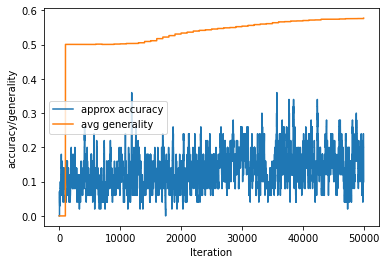

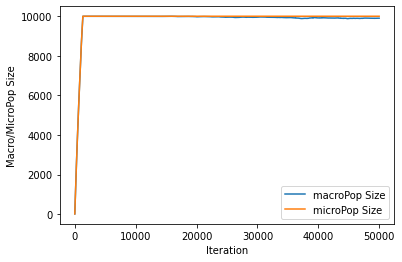

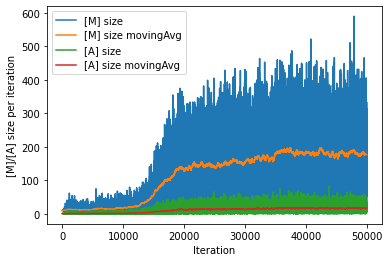

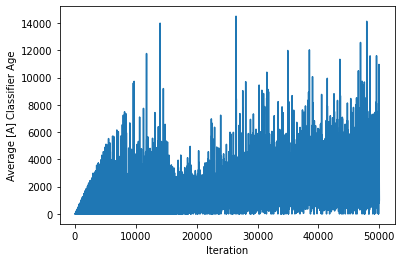

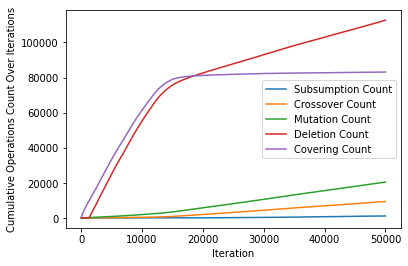

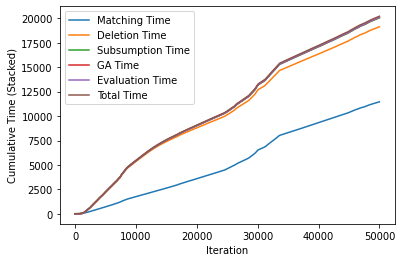

In [7]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

def cumulativeFreq(freq):
    a = []
    c = []
    for i in freq:
        a.append(i+sum(c))
        c.append(i)
    return np.array(a)

def movingAvg(a,threshold=300):
    weights = np.repeat(1.0,threshold)/threshold
    conv = np.convolve(a,weights,'valid')
    return np.append(conv,np.full(threshold-1,conv[conv.size-1]),)

dataTracking = pd.read_csv("iterationData_fashionmnist_Resnet_100_XCS.csv")

iterations = dataTracking["Iteration"].values
accuracy = dataTracking['Accuracy (approx)'].values
generality = dataTracking['Average Population Generality'].values
macroPop = dataTracking["Macropopulation Size"].values
microPop = dataTracking["Micropopulation Size"].values
mSize = dataTracking["Match Set Size"].values
aSize = dataTracking["Action Set Size"].values
experience = dataTracking["Average Iteration Age of Action Set Classifiers"].values
subsumption = dataTracking["# Classifiers Subsumed in Iteration"].values
crossover = dataTracking["# Crossover Operations Performed in Iteration"].values
mutation = dataTracking["# Mutation Operations Performed in Iteration"].values
covering = dataTracking["# Covering Operations Performed in Iteration"].values
deletion = dataTracking["# Deletion Operations Performed in Iteration"].values

gTime = dataTracking["Total Global Time"].values
mTime = dataTracking["Total Matching Time"].values
delTime = dataTracking["Total Deletion Time"].values
subTime = dataTracking["Total Subsumption Time"].values
selTime = dataTracking["Total GA Time"].values
evalTime = dataTracking["Total Evaluation Time"].values

plt.plot(iterations,accuracy,label="approx accuracy")
plt.plot(iterations,generality,label="avg generality")
plt.xlabel('Iteration')
plt.ylabel('accuracy/generality')
plt.legend()
plt.show()

plt.plot(iterations,macroPop,label="macroPop Size")
plt.plot(iterations,microPop,label="microPop Size")
plt.xlabel('Iteration')
plt.ylabel('Macro/MicroPop Size')
plt.legend()
plt.show()

plt.plot(iterations,mSize,label="[M] size")
plt.plot(iterations,movingAvg(mSize),label="[M] size movingAvg")
plt.plot(iterations,aSize,label="[A] size")
plt.plot(iterations,movingAvg(aSize),label="[A] size movingAvg")
plt.xlabel('Iteration')
plt.ylabel('[M]/[A] size per iteration')
plt.legend()
plt.show()

plt.plot(iterations,experience)
plt.ylabel('Average [A] Classifier Age')
plt.xlabel('Iteration')
plt.show()

plt.plot(iterations,cumulativeFreq(subsumption),label="Subsumption Count")
plt.plot(iterations,cumulativeFreq(crossover),label="Crossover Count")
plt.plot(iterations,cumulativeFreq(mutation),label="Mutation Count")
plt.plot(iterations,cumulativeFreq(deletion),label="Deletion Count")
plt.plot(iterations,cumulativeFreq(covering),label="Covering Count")
plt.xlabel('Iteration')
plt.ylabel('Cumulative Operations Count Over Iterations')
plt.legend()
plt.show()

plt.plot(iterations,mTime,label="Matching Time")
plt.plot(iterations,delTime+mTime,label="Deletion Time")
plt.plot(iterations,subTime+delTime+mTime,label="Subsumption Time")
plt.plot(iterations,selTime+subTime+delTime+mTime,label="GA Time")
plt.plot(iterations,evalTime+selTime+subTime+delTime+mTime,label="Evaluation Time")
plt.plot(iterations,gTime,label="Total Time")
plt.xlabel('Iteration')
plt.ylabel('Cumulative Time (Stacked)')
plt.legend()
plt.show()

In [8]:
trainedModel.export_final_rule_population("RulePopulationfashionmnistResnet100_XCS.csv",Features,classLabel)

populationData2 = pd.read_csv("RulePopulationfashionmnistResnet100_XCS.csv")
display(populationData2)

,0,1,2,3,4,5,6,7,8,9,...,Prediction Error,Accuracy,Numerosity,Avg Action Set Size,TimeStamp GA,Iteration Initialized,Specificity,Deletion Probability,Experience,Match Count
0,#,"-1.0569934225,0.39914530249999997",#,"-2.621382303,0.3136971030000002",#,"-1.301062092,2.341042632","-0.0694579675,3.1217441675",#,"-1.4683746700000002,0.036765070000000066",#,...,0.0,1.0,1,1.000000,228,228,0.60,0.000007,0,1
1,#,#,#,"-3.645269744,-0.14815385599999997","-1.5239847715000001,1.0088403715",#,"-0.9961665990000002,2.137013679",#,#,"-0.22607617800000024,1.7387373780000002",...,0.0,1.0,1,1.000000,1144,1144,0.48,0.000007,0,1
2,#,"-1.2462850505,1.6077468504999999","-1.9747872425,1.7916388625",#,"-1.94988426,0.52116466",#,#,"-3.76003466,-0.07034153999999981","-3.10203889,-0.6706593099999998","0.622006858,2.124511342",...,0.0,1.0,1,1.000000,1661,1661,0.53,0.000007,0,1
3,"-1.5727491880000002,2.171836988",#,#,"-2.601589734,1.5200111339999998",#,#,"1.3265045024999997,3.3572694975",#,"-1.6776124550000002,1.3905570150000002","-0.8109119820000001,1.847365182",...,0.0,1.0,1,1.000000,1912,1912,0.55,0.000007,0,1
4,#,"-0.6590677760000001,0.9718075960000001","-0.6332833355,3.0172527354999996","-2.272503168,-0.274151232",#,"-0.5182642500000001,3.55871865","0.9939262889999998,3.6629317109999997",#,"-2.6982066099999997,-0.49838699",#,...,0.0,1.0,1,1.000000,2763,2763,0.51,0.000007,1,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9896,#,"-1.0651256785,2.0218884185","-1.8663472065000002,2.2009222185",#,#,#,#,#,#,#,...,0.0,1.0,1,14.000000,49989,49989,0.27,0.000095,0,0
9897,#,#,#,#,#,#,#,#,"-2.32597225,-0.5892725499999999",#,...,0.0,1.0,1,23.584000,49990,49990,0.26,0.000160,0,1
9898,"-2.193981998,0.3804209980000002",#,#,"-3.69613615,-0.5737112499999999","-1.3808378434999997,2.583881071939778",#,#,#,#,#,...,0.0,1.0,1,18.725797,49990,49990,0.24,0.000127,0,0
9899,#,"-1.2677640005000002,2.7511788805","-2.44702661,1.0296744099999997","-1.6533181240000001,-0.029657176000000063",#,#,#,"-1.9458400975,1.8015044775",#,#,...,0.0,1.0,1,24.608000,49992,49992,0.33,0.000167,0,3


In [9]:
trainedModel.export_final_rule_population_DCAL("RulePopulationfashionmnistResnet1002_XCS.csv",Features,classLabel)

populationData3 = pd.read_csv("RulePopulationfashionmnistResnet1002_XCS.csv")
display(populationData3)

,Specified Values,Specified Attribute Names,Class Label,Fitness,Prediction,Prediction Error,Accuracy,Numerosity,Avg Action Set Size,TimeStamp GA,Iteration Initialized,Specificity,Deletion Probability,Experience,Match Count
0,"[-1.0569934225,0.39914530249999997], [-2.62138...","1, 3, 5, 6, 8, 10, 11, 12, 14, 16, 17, 18, 19,...",4,0.010000,10.000000,0.0,1.0,1,1.000000,228,228,0.60,0.000007,0,1
1,"[-3.645269744,-0.14815385599999997], [-1.52398...","3, 4, 6, 9, 11, 12, 13, 15, 16, 21, 22, 23, 25...",2,0.010000,10.000000,0.0,1.0,1,1.000000,1144,1144,0.48,0.000007,0,1
2,"[-1.2462850505,1.6077468504999999], [-1.974787...","1, 2, 4, 7, 8, 9, 12, 16, 17, 18, 19, 21, 22, ...",1,0.010000,10.000000,0.0,1.0,1,1.000000,1661,1661,0.53,0.000007,0,1
3,"[-1.5727491880000002,2.171836988], [-2.6015897...","0, 3, 6, 8, 9, 15, 16, 20, 22, 23, 25, 26, 27,...",9,0.010000,10.000000,0.0,1.0,1,1.000000,1912,1912,0.55,0.000007,0,1
4,"[-0.6590677760000001,0.9718075960000001], [-0....","1, 2, 3, 5, 6, 8, 12, 13, 14, 16, 17, 19, 21, ...",4,0.208000,0.000000,0.0,1.0,1,1.000000,2763,2763,0.51,0.000007,1,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9896,"[-1.0651256785,2.0218884185], [-1.866347206500...","1, 2, 12, 14, 15, 19, 20, 21, 26, 31, 34, 36, ...",4,0.015757,0.000000,0.0,1.0,1,14.000000,49989,49989,0.27,0.000095,0,0
9897,"[-2.32597225,-0.5892725499999999], [-2.9808715...","8, 12, 14, 15, 16, 17, 22, 24, 25, 33, 34, 38,...",3,0.011517,7.626041,0.0,1.0,1,23.584000,49990,49990,0.26,0.000160,0,1
9898,"[-2.193981998,0.3804209980000002], [-3.6961361...","0, 3, 4, 17, 20, 21, 24, 26, 30, 31, 37, 43, 4...",3,0.011517,7.626041,0.0,1.0,1,18.725797,49990,49990,0.24,0.000127,0,0
9899,"[-1.2677640005000002,2.7511788805], [-2.447026...","1, 2, 3, 7, 11, 12, 15, 16, 17, 19, 21, 22, 26...",4,0.014981,0.000000,0.0,1.0,1,24.608000,49992,49992,0.33,0.000167,0,3


# ROC and PRC Curves

## 0-49

### ROC and PRC Curves 0-9 

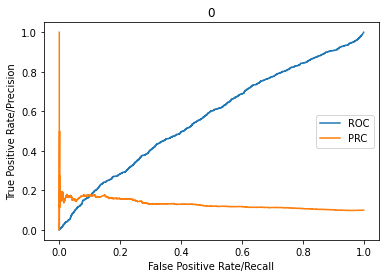

PRC AUC:0.12866663635265504
ROC AUC:0.5678913333333333


In [10]:
from sklearn.metrics import roc_curve, auc, precision_recall_curve
import matplotlib.pyplot as plt

probs = trainedModel.predict_proba(X_t)
fpr1, tpr1, thresholds1 = roc_curve(Y_test[:,0], probs[:,0])
prec1, recall1, thresholds1 = precision_recall_curve(Y_test[:,0], probs[:,0])

plt.plot(fpr1,tpr1,label="ROC")
plt.plot(recall1,prec1,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.legend()
plt.title('0')
plt.show()

print("PRC AUC:" + str(auc(recall1, prec1)))
print("ROC AUC:" + str(auc(fpr1, tpr1)))

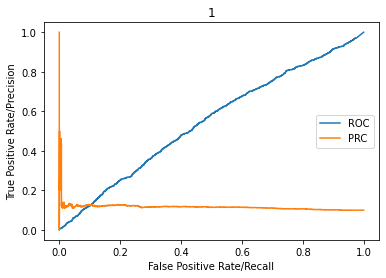

PRC AUC:0.11549726846676941
ROC AUC:0.5465787777777777


In [11]:
fpr2, tpr2, thresholds2 = roc_curve(Y_test[:,1], probs[:, 1])
prec2, recall2, thresholds2 = precision_recall_curve(Y_test[:,1], probs[:, 1])

plt.plot(fpr2,tpr2,label="ROC")
plt.plot(recall2,prec2,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.legend()
plt.title('1')
plt.show()

print("PRC AUC:" + str(auc(recall2, prec2)))
print("ROC AUC:" + str(auc(fpr2, tpr2)))

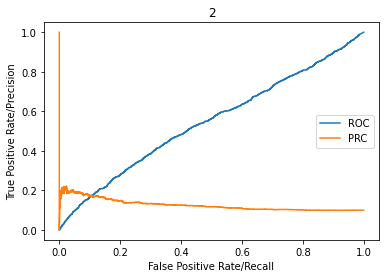

PRC AUC:0.12551863376908268
ROC AUC:0.5456329444444444


In [12]:
fpr3, tpr3, thresholds3 = roc_curve(Y_test[:,2], probs[:, 2])
prec3, recall3, thresholds3 = precision_recall_curve(Y_test[:,2], probs[:, 2])

plt.plot(fpr3,tpr3,label="ROC")
plt.plot(recall3,prec3,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.legend()
plt.title('2')
plt.show()

print("PRC AUC:" + str(auc(recall3, prec3)))
print("ROC AUC:" + str(auc(fpr3, tpr3)))

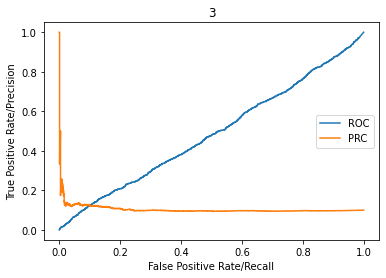

PRC AUC:0.10481775095421761
ROC AUC:0.48628516666666666


In [13]:
fpr4, tpr4, thresholds4 = roc_curve(Y_test[:,3], probs[:, 3])
prec4, recall4, thresholds4 = precision_recall_curve(Y_test[:,3], probs[:, 3])

plt.plot(fpr4,tpr4,label="ROC")
plt.plot(recall4,prec4,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.legend()
plt.title('3')
plt.show()

print("PRC AUC:" + str(auc(recall4, prec4)))
print("ROC AUC:" + str(auc(fpr4, tpr4)))

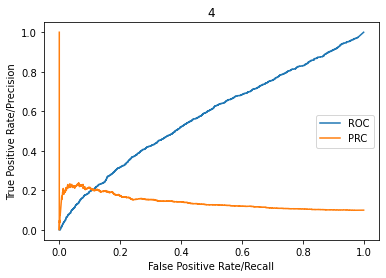

PRC AUC:0.13883923834213494
ROC AUC:0.5768534444444444


In [14]:
fpr5, tpr5, thresholds5 = roc_curve(Y_test[:,4], probs[:, 4])
prec5, recall5, thresholds5 = precision_recall_curve(Y_test[:,4], probs[:, 4])

plt.plot(fpr5,tpr5,label="ROC")
plt.plot(recall5,prec5,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.legend()
plt.title('4')
plt.show()

print("PRC AUC:" + str(auc(recall5, prec5)))
print("ROC AUC:" + str(auc(fpr5, tpr5)))

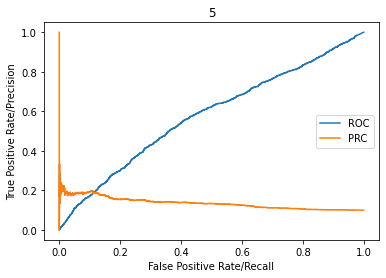

PRC AUC:0.13500472441774974
ROC AUC:0.5784611111111111


In [15]:
fpr6, tpr6, thresholds6 = roc_curve(Y_test[:,5], probs[:, 5])
prec6, recall6, thresholds6 = precision_recall_curve(Y_test[:,5], probs[:, 5])

plt.plot(fpr6,tpr6,label="ROC")
plt.plot(recall6,prec6,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.legend()
plt.title('5')
plt.show()

print("PRC AUC:" + str(auc(recall6, prec6)))
print("ROC AUC:" + str(auc(fpr6, tpr6)))

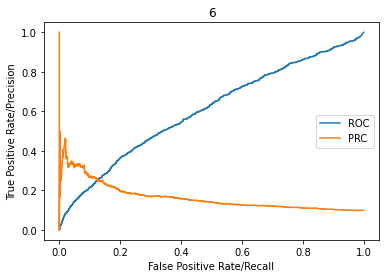

PRC AUC:0.16411145811270925
ROC AUC:0.6041315


In [16]:
fpr7, tpr7, thresholds7 = roc_curve(Y_test[:,6], probs[:, 6])
prec7, recall7, thresholds7 = precision_recall_curve(Y_test[:,6], probs[:, 6])

plt.plot(fpr7,tpr7,label="ROC")
plt.plot(recall7,prec7,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.legend()
plt.title('6')
plt.show()

print("PRC AUC:" + str(auc(recall7, prec7)))
print("ROC AUC:" + str(auc(fpr7, tpr7)))

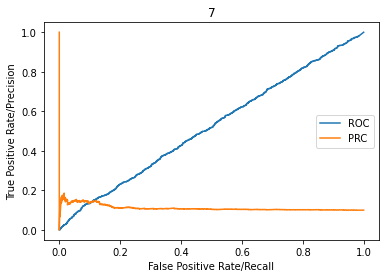

PRC AUC:0.11066963462389466
ROC AUC:0.5217266666666666


In [17]:
fpr8, tpr8, thresholds8 = roc_curve(Y_test[:,7], probs[:, 7])
prec8, recall8, thresholds8 = precision_recall_curve(Y_test[:,7], probs[:, 7])

plt.plot(fpr8,tpr8,label="ROC")
plt.plot(recall8,prec8,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.legend()
plt.title('7')
plt.show()

print("PRC AUC:" + str(auc(recall8, prec8)))
print("ROC AUC:" + str(auc(fpr8, tpr8)))

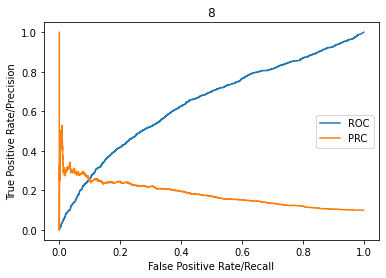

PRC AUC:0.18073430155830889
ROC AUC:0.6435551666666667


In [18]:
fpr9, tpr9, thresholds9 = roc_curve(Y_test[:,8], probs[:, 8])
prec9, recall9, thresholds9 = precision_recall_curve(Y_test[:,8], probs[:, 8])

plt.plot(fpr9,tpr9,label="ROC")
plt.plot(recall9,prec9,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.legend()
plt.title('8')
plt.show()

print("PRC AUC:" + str(auc(recall9, prec9)))
print("ROC AUC:" + str(auc(fpr9, tpr9)))

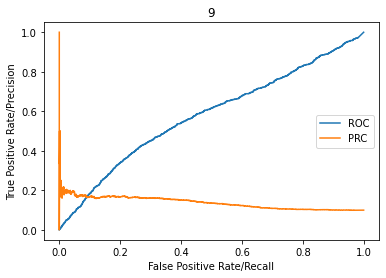

PRC AUC:0.1374178996681535
ROC AUC:0.5794527777777778


In [19]:
fpr10, tpr10, thresholds10 = roc_curve(Y_test[:,9], probs[:, 9])
prec10, recall10, thresholds10 = precision_recall_curve(Y_test[:,9], probs[:, 9])

plt.plot(fpr10,tpr10,label="ROC")
plt.plot(recall10,prec10,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.legend()
plt.title('9')
plt.show()

print("PRC AUC:" + str(auc(recall10, prec10)))
print("ROC AUC:" + str(auc(fpr10, tpr10)))